<b> Chapter 4 is a technical chapter which will go over the mathematics behind some of the machine learning models that have been used so far.  I will be focusing on the linear algebra definitions and applications as they more succinctly embody the theories and calculations </b>

# Linear Regression

<b> Simply put linear regression is a weighted average of features and a scalar bias.  The weights are bias are chosen based off the minimization of a cost function.  The most common cost function for linear regressions is Mean Squared Error (MSE) which is rooted (RMSE) when comparing across multiple models.  The reason MSE is used is because the derivative is much simpler to compute and requires significantly less computational power than the rooted version.  Since rooting the function simply scales it, selecting MSE to minimize has the same end result as selected RMSE to minimize.  This is true in general for any cost or reward function and it is encouraged to use the form of the cost function which minimizes computational effort. </b>

## The Normal Equation

#### ${\hat{\theta}}$ = $(\mathbf{X^T}\mathbf{X})^{-1} \mathbf{X^T} \mathbf{y}$

In this equation:

${\hat{\theta}}$ is the value of $\theta$ that minimizes the cost function
<br>
$\mathbf{y}$ is the vector of target values
<br>
$\mathbf{X}$ is a matrix of features with a bias column

In [1]:
' Generate some data to validate the above expression'
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # mx + b : 3x + 4 + noise

' Introduce the constant bias'
X_b = np.c_[np.ones((100, 1)), X] # m x n matrix with column of 1's and column of X values

' Apply the normal equation'
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.11885904],
       [2.89835696]])

<b> The bias chosen was 4 and the weight was 3.  The gaussian noise introduced makes it impossible to get these exact values but the derived values are almost perfect.</b>

In [2]:
' Make some predictions'
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11885904],
       [9.91557295]])

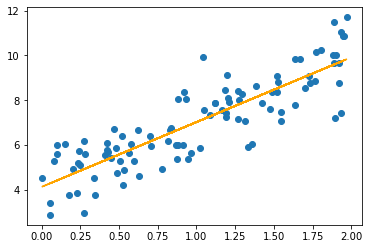

In [3]:
' Plot the raw data and the best fit predictions'
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_best), color='orange')

In [4]:
' Performing linear regression with sklearn is very simple'
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print('Bias: ', lin_reg.intercept_, 'Coefficient: ', lin_reg.coef_)

lin_reg.predict(X_new)

Bias:  [4.11885904] Coefficient:  [[2.89835696]]


array([[4.11885904],
       [9.91557295]])

<b> A caveat for inverted matrices is that they require a non-zero determinant.  This isn't always the case.  A work-around is the Moore-Penrose Inverse aka the pseudoinverse.  This utilizes Singular Value Decomposition to generate an equivalent matrix which is always invertible.  This method is also more computationally efficient. Sklearn ueses this method natively </b>

## Gradient Descent

<b> Gradient Descent outperforms sklearn and the Normal Equation when the dataset is extremely large (100,000+ features).  </b>

<b> General notes about gradient descent </b>
* Tweaks parameters iteratively in order to minimize a cost function
* Not all cost functions are convex.  As such, one hurdle for gradient descent is overcoming local minima and plateaus
* The learning rate is the primary parameter for correctly finding the absolute minima.  Too high and the optimizer will diverge and never find a minima. Too low and it will stop too soon at a local minima
* Because a convex function has exactly 1 minima they are ideal. If possible, transform the cost function such that its transformation is convex.
* Scaling all features has an enormous impact on how long it takes for the optimizer to find the mininma. 
* Gradient descent utilizes the properties of partial derivatives.  As such, a less complex derivative is arguably more important than a convex, continuous function.  Both is ideal.

## Gradient Vector of the Cost Function

#### $\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta) = \frac{2}{m}\mathbf{X}^{T}(\mathbf{X}\boldsymbol\theta - \mathbf{y})$

<br>

<b> Notice that this formula computes over the full training set X at each step.  The batch size here is 1 and as a result the training time on large datasets will be greatly impacted.  There are other ways to do this involving larger batch sizes which will be discussed later<b>

## Gradient Descent Step

#### $\boldsymbol\theta^{(next step)} = \boldsymbol\theta - \eta\nabla_{\boldsymbol\theta}MSE(\boldsymbol\theta)$

In [5]:
' Validate the above expressions'
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
print (theta, '\n', '\n', 'This is exactly what the Normal Equation yielded')


[[4.11885904]
 [2.89835696]] 
 
 This is exactly what the Normal Equation yielded


### Stochastic Gradient Descent

<b> Opposite to batch gradient descent which uses the entire training set at each epoch, stochastic gradient descent takes one random sample from the training set at each epoch and applies the gradient descent step.  This requires vastly less memory and as such is a better choice for very large training sets.  However, there are some nuances to the process.  Due to the randomness the descent curve will not be smooth and the optimal solution will never be settled upon.  This can help escape local minima but comes at the cost of a less perfect output.  One solution to converging on the optimal output using stochastic gradient descent is to implement a learning schedule in which the learning rate is gradually reduced such that the random jumps at the point of convergence are so small that the output is essentially the same as batch gradient descent. </b>

In [6]:
' An SGD example with a simple learning schedule'

# Epochs
n_epochs = 50

# Learning rate schedule
t0, t1 = 5, 50 

def learning_rate_schedule(t):
    return t0 / (t + t1)

# Random initialization
theta = np.random.randn(2, 1)

# SGD
for epoch in range(n_epochs):
    for i in range(m):  # m = 100 was declared in an earlier code block
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.06514835],
       [2.92730976]])

<b> When using SGD it is best practice to shuffle the training set </b>

In [7]:
' Implementing SGD with Sklearn'
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() is a numpy function which flattens an array into a single 1D array with all the input-array elements and with the same type as it

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.14405085] [2.96046418]


### Mini-batch Gradient Descent

<b> Mini-batch gradient desecent is essentially the middle ground between batch and sgd.  It computes gradients on small, random sets of instances called mini-batches. One advantage of SGD is you can get performance boosts from hardward optimzation when using matrix operations and GPUs.  It will likely end up closer to the minimum than SGD as well, although it may be harder to escape from local minima.  For large datasets this is usually the best algorithm. <b>

### Polynomial Regression

<b> Suprisingly, you can use linear regression algorithms to model non-linear relationships.  For example, consider a simple parabola.  You can simply augment the square of the feature(s) as additional features into the dataset and viola, you can use linear regression to estimate non-linear relationships <b>

In [8]:
' An example of estimating a polynomial function with linear regression'
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-1.92312747]), array([-1.92312747,  3.69841925]))

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# Here we see an intercept close to 2, a second-degree coeffecient close to 0.5, and a first-degree coeffecient close to 1 as expected

(array([1.97744395]), array([[0.94651612, 0.51595379]]))

<b> Note that the PolynomialFeatures(degree=d) class will transform an array containing n-features into an array containing $\large\frac{(n + d)!}{d!n!}$ features.  Be cautious of the combinatorix nature of this augmentation <b>

### Learning Curves

<b> If, during cross-valdiation, a model performs well on training data but poor on valdation data it is likley overfitting.  If it performs poorly on both it is likely underfitting. This is one method to test for fitness.  Another is to analyze the learning curve.  Learning curves are plots of the model's performance on the training set and valdiation set as a function of the training set sieze (or the training iteration). <b>

In [10]:
' Observe an underfitting learning curve set'
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.axis([0, X_train.shape[0], 0, 3])
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

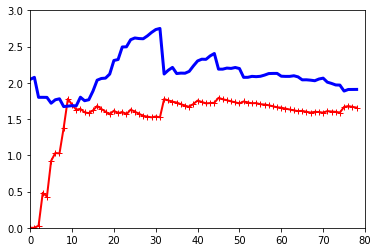

In [11]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

<b> These learning curves are typical of a model that is underfitting.  Both curves have reached a plateau; they are close and fairly high.  If a model is underfitting the training data, adding more training examples will not help.  You need to use a more complex model or come up with better features </b>

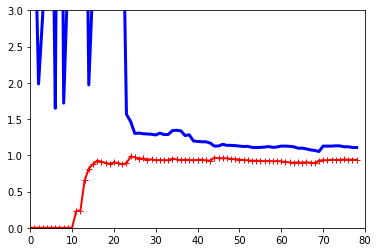

In [12]:
' Observe a model that is overfitting'
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

<b> The error here is lower than the underfit model and it performs much better on the training data.  This example doesn't show well but often you'll see a noticeable gap between the training and validation curve.  These are all characteristic of an overfit model.  One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error </b>

### The Bias/Variance Trade-off

<b> An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:</b>
    <br>
<b><i> Bias <i><b>:
    <br>
> A high-bias model is most likely to underfit the training data.  This is due to wrong assumptions, like fitting a straight line to a curve.
    
<b><i> Variance <b><i>:
> A model with many degrees of freedom is likely to have high variance and thus overfit the training data.  This is caused by extra sensitivity to small variations in the training data.
    <br>
    
<b><i> Irreducible error <b><i>:
> The only way to reduce this part of the error is to clean up the data.  Fix data sources, such as broken sensors, or detect and remove outliers. </b>

## Regularized Linear Models

<b> A good way to reduce overfitting is to regularize the model (i.e. to constrain it).  A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  For a linear model, regularization is typically achieved by constraining the weights of the model.  Three common methods of regularization are <i> Ridge Regression, Lasso Regression, and Elastic Net <i><b>

### Ridge Regression

<b> Ridge regression, also known as Tikhonov regularization, is a regularized version of Linear Regression.  A regularization term equal to $\alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$ is added to the cost function.  This forces the learning algorithm to keep the model weights as small as possible.  The regularization term should only be added to the cost function during training.  Once the model is trained use the unregularized performance measure to evaluate the model's performance. 
<br><br>
It is quite common for the cost function used during training to be different from the performance measure used for testing. A good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective.
<br><br>
If $\alpha = 0$ then the Ridge Regression is just Linear Regression.  If $\alpha$ is very large then all weights end up close to zero and the result is a flat line through the data's mean. The full form for the Ridge Regression cost function is:
<br><br>
$J(\boldsymbol\theta) = MSE(\boldsymbol\theta) + \alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$
<br><br>
Note that the bias term $\theta{\scriptscriptstyle 0}$ is not regularized.<b>

In [13]:
' Use Ridge Regression with scikit-learn using the closed-form formula.'
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

# Alternatively you can set the solver hyperparameter to 'sag' to run the Ridge model with gradient descent.

array([[4.7752796]])

In [14]:
' Use Ridge Regression with scikit-learn using gradient descent.'
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# The penalty hyperparameter sets the type of regularization term to use.  l2 corresponds to ridge regression.

array([4.76861553])

### Lasso Regression

<b> Least Absolute Shrinkage and Selection Operator Regression is another regularized version of Linear Regression.  It adds a regularization term to the cost function, but it uses the L1 norm instead of half the square of the L2 norm. The cost function is as follows:
<br><br>
$J(\boldsymbol\theta) = MSE(\boldsymbol\theta) + \alpha\sum_{i=1}^{n} |\theta{\scriptstyle i}|$
<br><br>
An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features.  In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (few non-zero weights).  Compared to Ridge Regression there are two main differences with Lasso.  First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down which helps convergence.  Second, the optimal parameters get closer and closer to 0 when you increase $\alpha$, but they never get eliminated entirely.
<br><br>
The Lasso cost function is not differentiable at $\theta{\scriptstyle i}$ = 0 but gradient descent works fine if you use piece-wise the cost function and set the cost function to 0 when $\theta{\scriptstyle i}$ = 0

In [15]:
' Example of Lasso regression'
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# This is equivalent to setting the SGDRegressor(penality='l1')

array([4.73016106])

### Elastic Net

<b> Elastic Net is a middle ground between Ridge Regression and Lasso Regression.  The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio <i> r </i>.  When r = 0 Elastic Net is equivalent to Ridge Regression and when r = 1 it is equivalent to Lasso Regression.  The cost function is as follows:
<br><br>
$J(\boldsymbol\theta) = MSE(\boldsymbol\theta) + r\alpha\sum_{i=1}^{n} |\theta{\scriptstyle i}| + \frac{1 - r}{2}\alpha\sum_{i=1}^{n} \theta{\scriptstyle i}^{2}$
<br><br>
When should you use which regularization technique?  It is almost always preferable to have at least a little bit of regularization.  Ridge is a good default but if you suspect only a few features are useful you should prefer Lasso or Elastic Net because they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [16]:
' Example of Elastic Net'
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  #l1_ratio corresponds to the mix ratio r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73463765])

### Early Stopping

<b>An elegant and simple regularization technique is early stopping.  This applies to iterative models like Gradient Descent.  By observing the loss curves of both the training set and validation set and ending the training once the validation loss begins to increase you can simply optimize your model to avoid over-fitting.  For more sporadic loss curves you can run until the validation loss is certainly increasing then roll back the model parameters to the point where the validation error was at a minimum <b>

In [28]:
' Basic implementation of early stopping'
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol= -np.inf,
    warm_start=True, # When the fit() method is called it continues training where it left off vs. restarting from scratch
    penalty=None,
    learning_rate='constant',
    eta0=0.0005
)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [32]:
best_model.fit(X_train_poly_scaled, y_train.ravel())
best_model.coef_, best_model.intercept_

(array([0.06055222, 0.05300337, 0.05015628, 0.04847403, 0.04156685,
        0.04283305, 0.03566116, 0.03818836, 0.03158398, 0.03469195,
        0.02874959, 0.03211082, 0.02675661, 0.03020251, 0.02533499,
        0.02878509, 0.02430638, 0.02773159, 0.02355336, 0.02695372,
        0.02299772, 0.02638865, 0.02258627, 0.02599038, 0.02228195,
        0.02572417, 0.02205827, 0.0255632 , 0.02189588, 0.02548631,
        0.02178036, 0.02547659, 0.02170079, 0.02552039, 0.02164882,
        0.02560661, 0.02161803, 0.02572618, 0.02160343, 0.02587166,
        0.02160115, 0.02603696, 0.02160818, 0.0262171 , 0.0216222 ,
        0.02640795, 0.02164141, 0.02660619, 0.02166444, 0.02680907,
        0.02169023, 0.02701437, 0.021718  , 0.0272203 , 0.02174717,
        0.02742541, 0.02177731, 0.02762855, 0.02180813, 0.02782882,
        0.02183941, 0.0280255 , 0.02187104, 0.02821807, 0.02190294,
        0.02840613, 0.02193508, 0.02858938, 0.02196746, 0.02876763,
        0.02200009, 0.02894076, 0.02203301, 0.02